# Car Price Prediction System A3

Made by Nirut Gammayeengoen, st123472

# ``Preprocessing Part``

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Load data

In [2]:
# Load the dataset
df = pd.read_csv('../data/beforepreprocessing/Cars.csv')

## 2. Exploratory Data Analysis (EDA)

In [3]:
# Check dataset
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [4]:
# Check Dtypes of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
# Check shape of data
df.shape

In [5]:
# Check statistical information
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
# Putting the selling_price in a bucket of 0, 1, 2, 3 which will result in a 4-class classification problem.

# Define the bins and labels for the selling_price classes
bins = [0, 300000, 600000, 900000, float('inf')]  # Adjust the bin edges as needed
labels = [0, 1, 2, 3]  # Corresponding labels for each class

df['selling_price_classes'] = pd.cut(df['selling_price'], bins=bins, labels=labels, include_lowest=True)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_classes
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,1
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,1
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,0


In [7]:
# Check column 'selling_price' with 'selling_price_classes'
df[['selling_price', 'selling_price_classes']]

,selling_price,selling_price_classes
0,450000,1
1,370000,1
2,158000,0
3,225000,0
4,130000,0
...,...,...
8123,320000,1
8124,135000,0
8125,382000,1
8126,290000,0


In [8]:
# Save df after separate classes into drive
df.to_csv('../data/afterpreprocessing/Cars(separate_classes).csv', index=False)

In [9]:
### Drop column 'selling_price', to remaining only 'selling_price_classes' because this will solve classification problem
df.drop(columns=['selling_price'], inplace=True)
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_classes
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,0
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,0
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,0


### Renaming

I would like to rename feature "name" to be "brand" because better for match with brand of cars, and take only the first word and remove the rest

In [10]:
# Rename column
df.rename(columns={'name': 'brand'}, inplace=True)
df['brand'] = df['brand'].str.split().str.get(0)
df.head()

,brand,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_classes
0,Maruti,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1
1,Skoda,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1
2,Honda,2006,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,0
3,Hyundai,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,0
4,Maruti,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,0


### 2.1 Univariate Analysis

Single variable exploratory data analysis

### Countplot

<Axes: xlabel='seller_type', ylabel='count'>

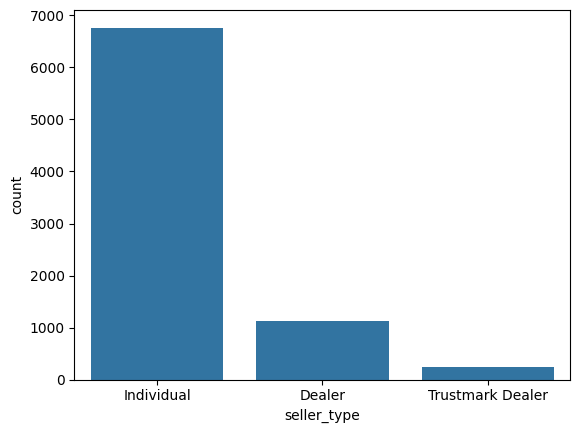

In [11]:
# Let's see how many seller_type there are
sns.countplot(data=df, x='seller_type')

<Axes: xlabel='owner', ylabel='count'>

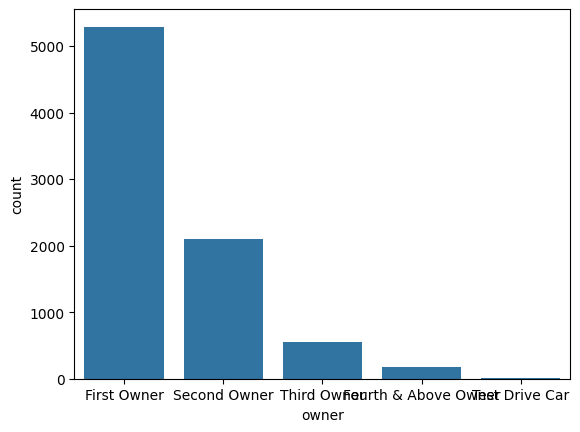

In [12]:
# Let's see how many owner type there are
sns.countplot(data=df, x='owner')

Selling price mostly show in area of near 1 million.

### Distribution plot

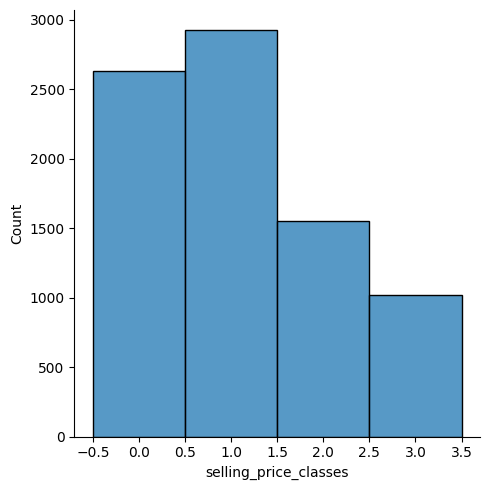

In [13]:
# Let's see distribution of selling_price
sns.displot(data=df, x='selling_price_classes')

### 2.2 Multivariate analysis

Multiple variable exploratory data analysis

### Boxplot

Text(0.5, 0, 'Seller Type')

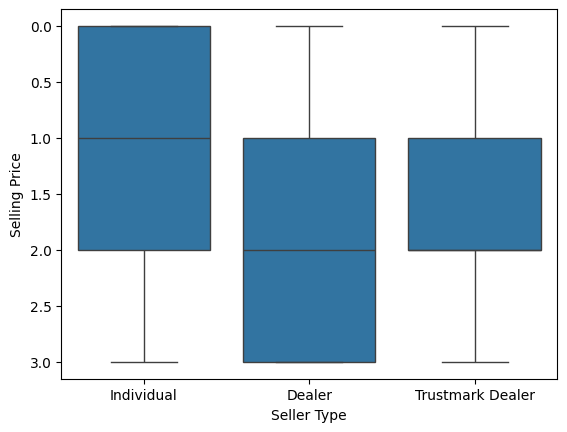

In [14]:
# Let's try bar plot on "seller_type"
sns.boxplot(x=df['seller_type'], y=df['selling_price_classes'])
plt.ylabel('Selling Price')
plt.xlabel('Seller Type')

Text(0.5, 0, 'Owner')

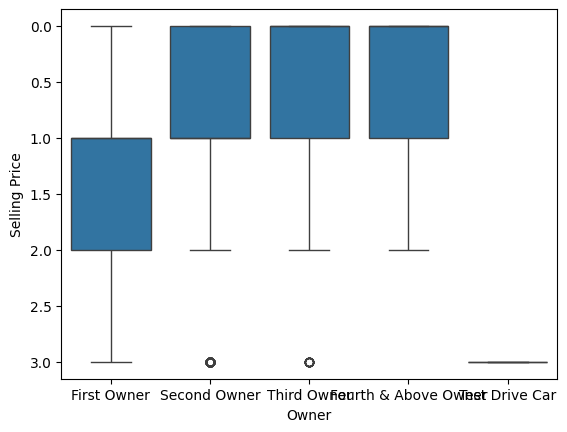

In [15]:
# Try bar plot on "owner"
sns.boxplot(x=df['owner'], y=df['selling_price_classes'])
plt.ylabel('Selling Price')
plt.xlabel('Owner')  

Found out that "Test Drive Car" are ridiculously expensive, I will delete all samples related to it.

In [16]:
# Check the shape of data before delete related samples
df.shape

(8128, 13)

In [17]:
df.drop(df[df['owner'] == 'Test Drive Car'].index, inplace=True)

In [18]:
df.shape

(8123, 13)

In [19]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner'], dtype=object)

### Map feature "owner" to be number

In [20]:
mapping_dict = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4
}
df['owner'] = df['owner'].map(mapping_dict)

In [21]:
# check data change or not?
df['owner'].unique()

array([1, 2, 3, 4])

In [22]:
# check overview of data
df.head()

,brand,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_classes
0,Maruti,2014,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1
1,Skoda,2014,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1
2,Honda,2006,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,0
3,Hyundai,2010,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,0
4,Maruti,2007,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,0


### Scatterplot

<Axes: xlabel='year', ylabel='selling_price_classes'>

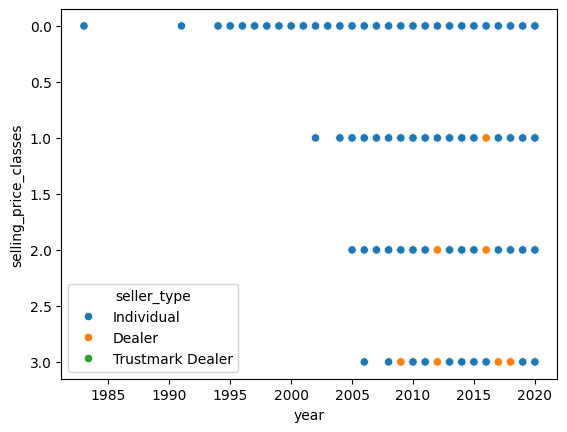

In [23]:
sns.scatterplot(x=df['year'], y=df['selling_price_classes'], hue=df['seller_type'])

<Axes: xlabel='km_driven', ylabel='selling_price_classes'>

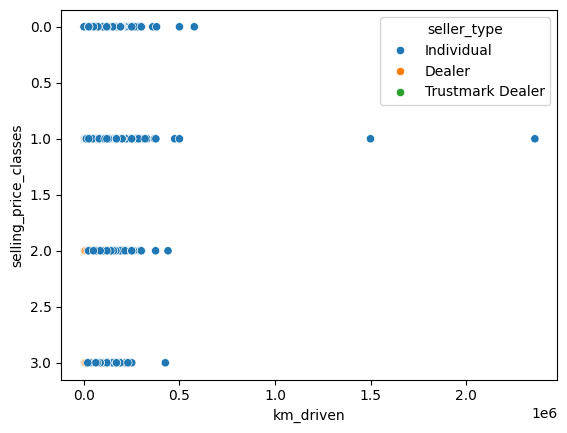

In [24]:
sns.scatterplot(x=df['km_driven'], y=df['selling_price_classes'], hue=df['seller_type'])

<Axes: xlabel='mileage', ylabel='selling_price_classes'>

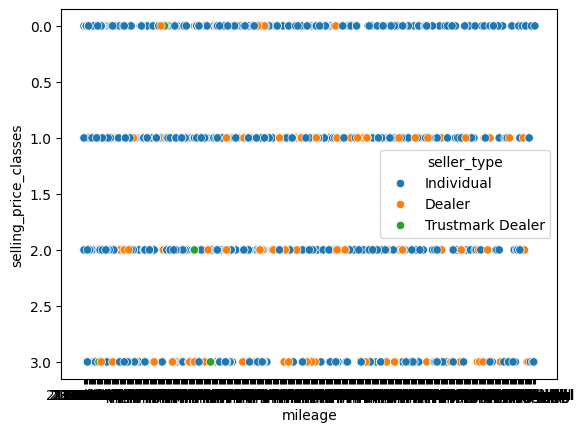

In [25]:
sns.scatterplot(x=df['mileage'], y=df['selling_price_classes'], hue=df['seller_type'])

### Feature "fuel", remove all row of value "CNG" and "LPG"

because 'CNG' and 'LPG' use a different mileage system i.e., km/kg which is differenct from kmfeaturepl for Diesel and Petrol

In [26]:
# Check the shape of data before delete related rows
df.shape

(8123, 13)

In [27]:
df.drop(df[(df['fuel'] == 'CNG') | (df['fuel'] == 'LPG')].index, inplace=True)

In [28]:
# Check the shape of data after deleted related samples
df.shape

(8028, 13)

### Feature: mileage,
- Remove 'kmpl', and 
- convert column to float

In [29]:
df['mileage'] = df['mileage'].str.split().str.get(0)
df['mileage'] = df['mileage'].astype(float)

### Feature: engine,
- Remove 'CC', and 
- convert column to float

In [30]:
df['engine'] = df['engine'].str.split().str.get(0)
df['engine'] = df['engine'].astype(float)

### Feature: max_power,
- Remove 'bhp', and 
- convert column to float

In [31]:
df['max_power'] = df['max_power'].str.split().str.get(0)
df['max_power'] = df['max_power'].astype(float)

### Feature: torqe,
- Drop for simply because don't understand well about it

In [32]:
df.drop(columns=['torque'], inplace=True)

In [33]:
# check overview of data now
df.head()

,brand,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price_classes
0,Maruti,2014,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0,1
1,Skoda,2014,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0,1
2,Honda,2006,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0,0
3,Hyundai,2010,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0,0
4,Maruti,2007,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0,0


In [34]:
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [35]:
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [36]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [37]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

### Label encoding

change text to unique number

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['brand'] = le.fit_transform(df['brand'])
df['fuel'] = le.fit_transform(df['fuel'])
df['seller_type'] = le.fit_transform(df['seller_type'])
df['transmission'] = le.fit_transform(df['transmission'])

In [39]:
df['brand'].unique()

array([20, 27, 10, 11, 29,  9, 26, 19, 28,  4,  7,  6, 14, 21, 22,  2, 30,
        3, 23, 17, 13, 16, 18, 31,  5, 15,  8,  0,  1, 12, 24, 25])

In [40]:
df['fuel'].unique()

array([0, 1])

In [41]:
df['seller_type'].unique()

array([1, 0, 2])

In [42]:
df['transmission'].unique()

array([1, 0])

### After convert feature "brand" to unique number, it shows 32 difference numbers and seem like not related popular brands match with ordering unique price in the market, so I decide to drop brand

In [43]:
df.drop(columns=['brand'], inplace=True)

In [44]:
df.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price_classes
0,2014,145500,0,1,1,1,23.40,1248.0,74.00,5.0,1
1,2014,120000,0,1,1,2,21.14,1498.0,103.52,5.0,1
2,2006,140000,1,1,1,3,17.70,1497.0,78.00,5.0,0
3,2010,127000,0,1,1,1,23.00,1396.0,90.00,5.0,0
4,2007,120000,1,1,1,1,16.10,1298.0,88.20,5.0,0


### Correlation Matrix

Use correlation matrix to find strong factors predicting the selling price, and also for checking whether certain features are too correlated.

<Axes: >

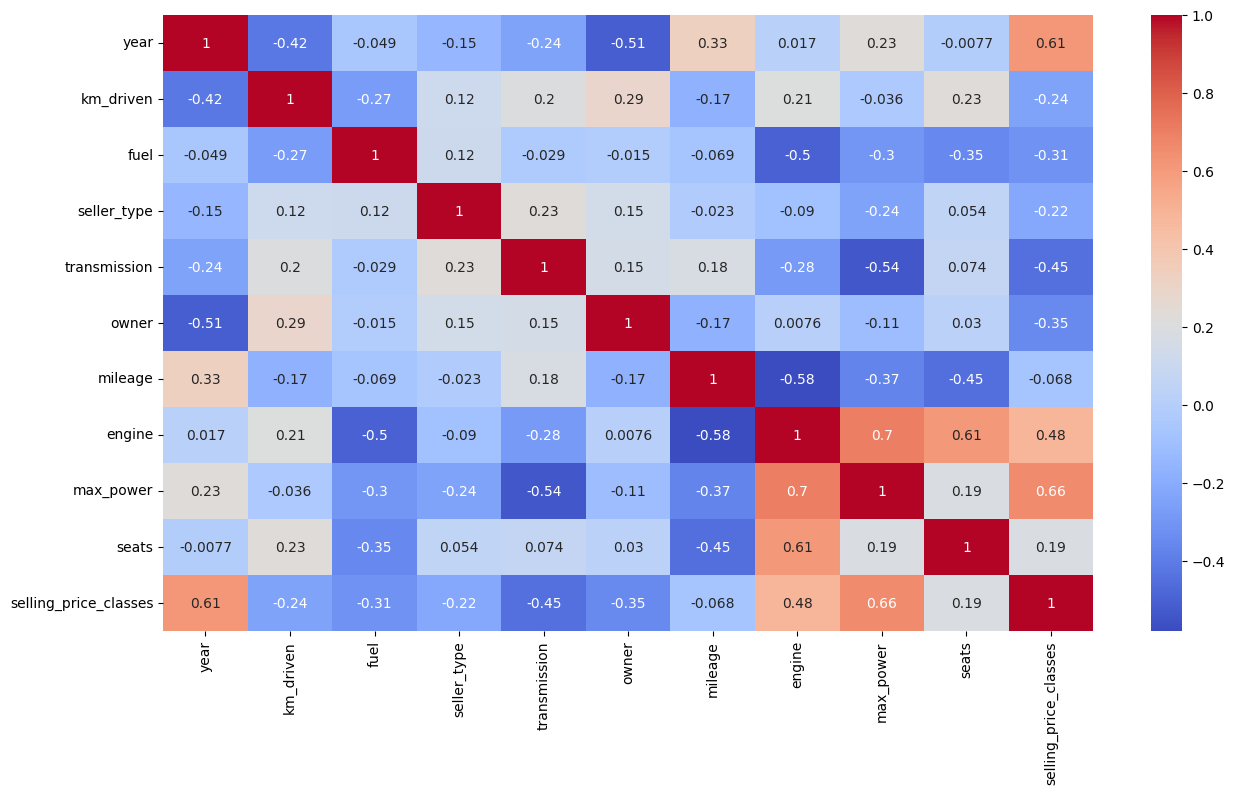

In [45]:
# Check out heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Predictive Power Score

Check the predictive power of some feature. Unlike correlation, `pps` actually obtained from actual prediction.

<Axes: xlabel='x', ylabel='y'>

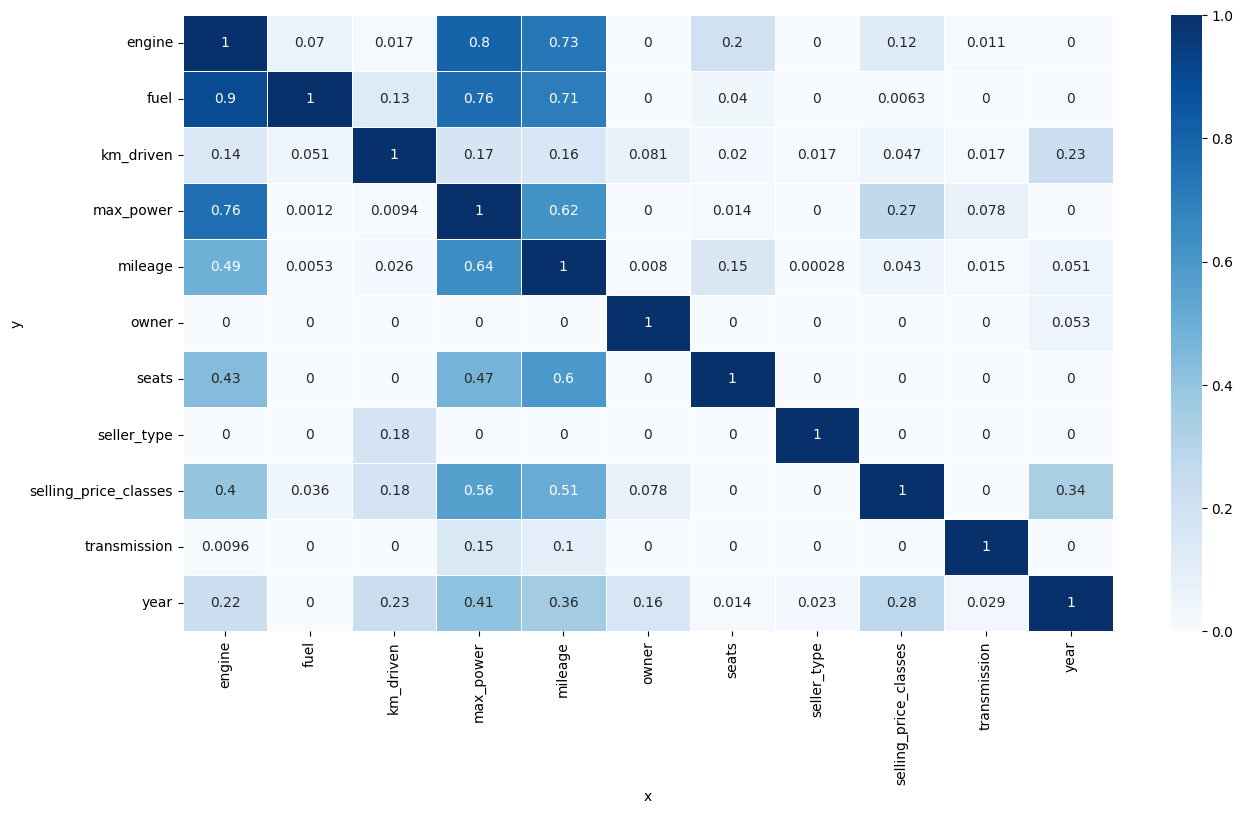

In [46]:
import ppscore as pps

# this needs some minor preprocessing because seaborn.heatmp unfortuately does not accept tidy data
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# plot
plt.figure(figsize=(15, 8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap='Blues', linewidths=0.5, annot=True)

## 3. Feature Engineering

In [ ]:
# skip

## 4. Feature Selection

In [47]:
# x is strong features
X = df[['engine', 'max_power','mileage']]

# y is simply the selling_price col
y = df['selling_price_classes']

### Train/Test Split

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 5. Preprocessing

In [49]:
# Check X_train
X_train

,engine,max_power,mileage
6853,2499.0,72.40,13.58
1495,2523.0,62.10,15.96
7904,1248.0,88.76,20.77
1281,1248.0,90.00,18.80
1421,1396.0,90.00,23.00
...,...,...,...
5293,1197.0,78.90,20.36
5461,998.0,67.04,20.51
865,1248.0,88.76,20.77
7701,2487.0,214.56,22.37


In [50]:
# Check y_train
y_train

6853    1
1495    1
7904    1
1281    0
1421    0
       ..
5293    0
5461    1
865     2
7701    3
7366    2
Name: selling_price_classes, Length: 5619, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [51]:
# Check X_test
X_test

,engine,max_power,mileage
5948,1368.0,90.00,15.00
6039,1582.0,126.20,19.67
3069,998.0,67.04,20.51
6531,1461.0,108.45,19.01
322,1186.0,73.97,24.00
...,...,...,...
5744,1197.0,80.00,17.00
1010,1498.0,99.23,26.10
4856,1172.0,65.00,16.50
7542,1248.0,88.50,24.30


In [52]:
# Check y_test
y_test

5948    0
6039    2
3069    1
6531    2
322     1
       ..
5744    0
1010    1
4856    0
7542    2
560     0
Name: selling_price_classes, Length: 2409, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

### Null values

In [53]:
#check for null values
X_train[['engine', 'max_power', 'mileage']].isna().sum()

engine       154
max_power    149
mileage      154
dtype: int64

In [54]:
X_test[['engine', 'max_power', 'mileage']].isna().sum()

engine       60
max_power    59
mileage      60
dtype: int64

In [55]:
y_train.isna().sum()

0

In [56]:
y_test.isna().sum()

0

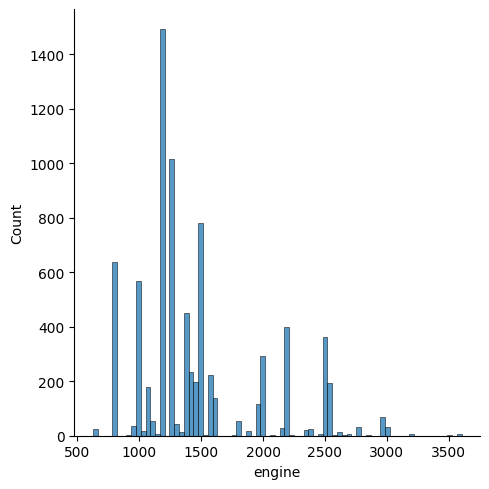

In [57]:
sns.displot(data=df, x='engine')

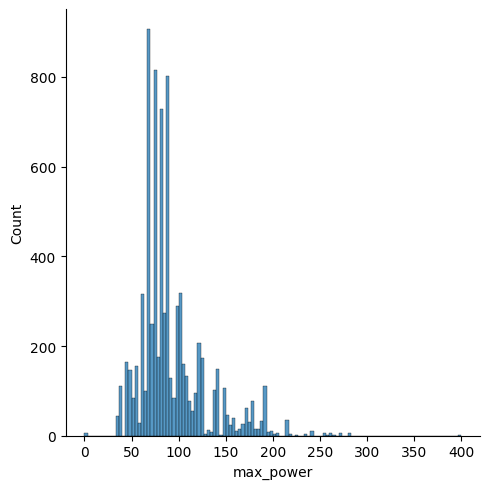

In [58]:
sns.displot(data=df, x='max_power')

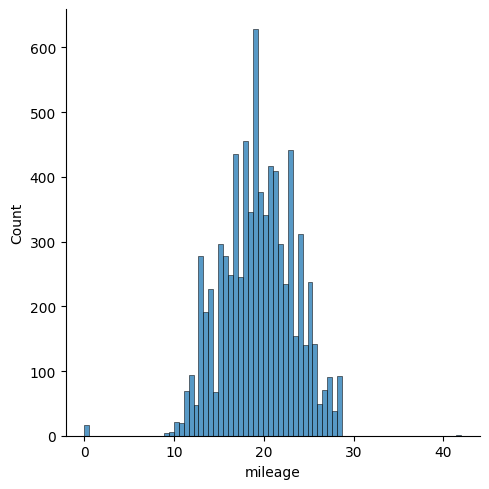

In [59]:
sns.displot(data=df, x='mileage')

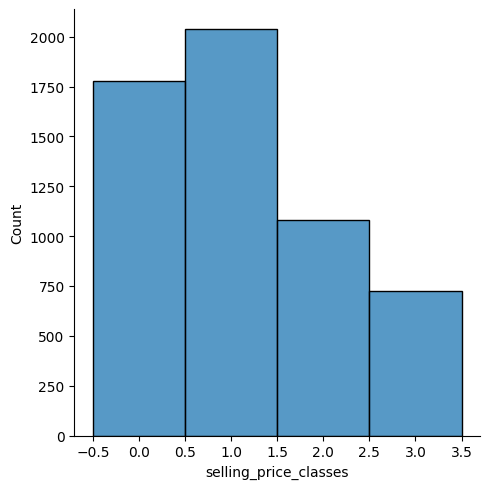

In [60]:
sns.displot(y_train)

In [61]:
#let's fill the training set first!
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].median(), inplace=True)

In [62]:
#let's fill the testing set with the training distribution first!
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].median(), inplace=True)

In [63]:
#check again
X_train[['engine', 'max_power', 'mileage']].isna().sum()

engine       0
max_power    0
mileage      0
dtype: int64

In [64]:
X_test[['engine', 'max_power', 'mileage']].isna().sum()

engine       0
max_power    0
mileage      0
dtype: int64

In [65]:
y_train.isna().sum(), y_test.isna().sum()

(0, 0)

### Check Outliers

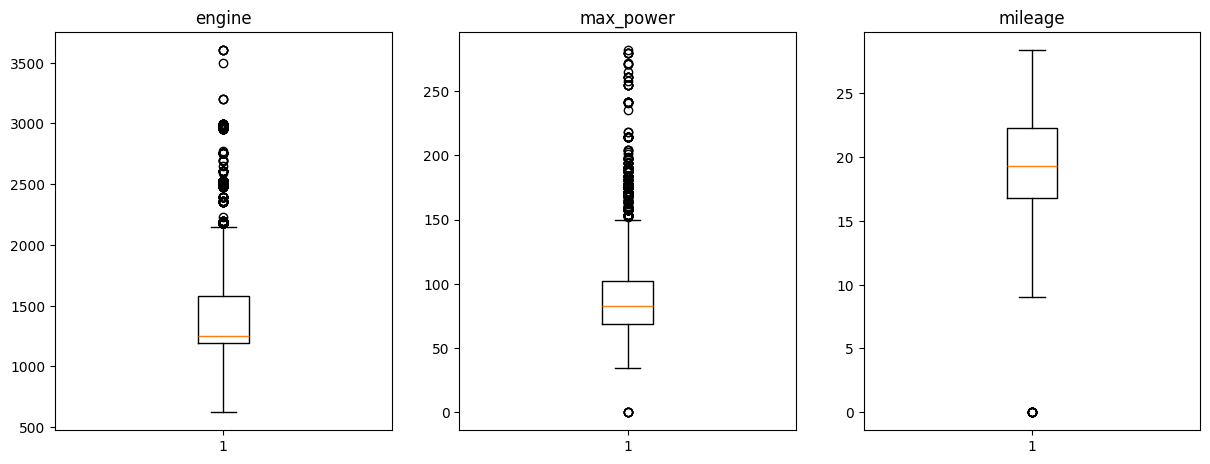

In [66]:
# Create a dictionary of columns.
col_dict = {'engine': 1, 'max_power': 2, 'mileage': 3}

# Detect outliers in each variables using box plots.
plt.figure(figsize=(20, 30))

for variable, i in col_dict.items():
    plt.subplot(5, 4, i)
    plt.boxplot(X_train[variable])
    plt.title(variable)

plt.show()

In [67]:
# Create the outlier_count function

def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [68]:
# Call the outlier_count function to use with X_train

for col in X_train.columns:
    outlier_count(col)


---------------engine---------------

Number of outliers: 836
Percent of data that is outlier: 14.88%

---------------max_power---------------

Number of outliers: 409
Percent of data that is outlier: 7.28%

---------------mileage---------------

Number of outliers: 14
Percent of data that is outlier: 0.25%


### Scaling

In [69]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test) 

In [70]:
# Check shapes of all X_train, X_test, y_train, y_test

print('Shape of X_train: ', X_train.shape)
print('Shape of X_test : ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test : ', y_test.shape)

Shape of X_train:  (5619, 3)
Shape of X_test :  (2409, 3)
Shape of y_train:  (5619,)
Shape of y_test :  (2409,)


# ``Modeling Part``

## 6. Modeling

In [71]:
from sklearn.linear_model import LinearRegression # I am using regression model
from sklearn.metrics import mean_squared_error, r2_score # For using MSE and r2

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print('MSE: ', mean_squared_error(y_test, yhat))
print('r2 : ', r2_score(y_test, yhat))

MSE:  0.5072203465198104
r2 :  0.49162006372113376


### Cross validation + Grid search

In [72]:
from sklearn.linear_model import LinearRegression # I am using regression model
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Put models in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state=0),
              RandomForestRegressor(n_estimators=100, random_state=0)]

# The names of the models
algorithm_names = ['Linear Regression', 'SVR', 'KNeighbors Regressor', 'Decision-Tree Regressor', 'Random-Forest Regressor']

In [73]:
from sklearn.model_selection import KFold, cross_val_score

# Lists for keeping mse
train_mse = []
test_mse  = []

# Defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f'{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}')

Linear Regression - Score: [-0.53165179 -0.51340778 -0.48711271 -0.54958736 -0.5389871 ]; Mean: -0.5241493487236702
SVR - Score: [-0.40420647 -0.45645677 -0.48979424 -0.42894096 -0.41717406]; Mean: -0.43931449736349465
KNeighbors Regressor - Score: [-0.26330961 -0.22907473 -0.27533808 -0.24046263 -0.24416741]; Mean: -0.2504704924214816
Decision-Tree Regressor - Score: [-0.2316564  -0.21741897 -0.20830279 -0.24974623 -0.21843956]; Mean: -0.22511279074413326
Random-Forest Regressor - Score: [-0.20301012 -0.20022461 -0.23522439 -0.22741368 -0.19290204]; Mean: -0.21175496781313755


In [74]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state=1)

grid = GridSearchCV(estimator = rf,
                    param_grid = param_grid,
                    cv = kfold,
                    n_jobs = -1,
                    return_train_score = True,
                    refit = True,
                    scoring = 'neg_mean_squared_error')

# Fit grid_search
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [75]:
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 15}

In [76]:
# Find grid_search's best score
best_mse = grid.best_score_

In [77]:
best_mse

-0.2090177062884858

## 7. Testing

#### Convert yhat backed before test

In [78]:
yhat = grid.predict(X_test)

In [79]:
yhat

array([0.        , 2.67215763, 0.87243226, ..., 0.06666667, 2.11453063,
       0.11370239])

In [ ]:
# yhat = np.exp(yhat)
# yhat

In [80]:
mean_squared_error(y_test, yhat)

0.18644203087744293

## 8. Analysis

### Algorithm way

In [81]:
# Grid here is random forest
rf = grid.best_estimator_

rf.feature_importances_

array([0.11175366, 0.68700565, 0.20124069])

<BarContainer object of 3 artists>

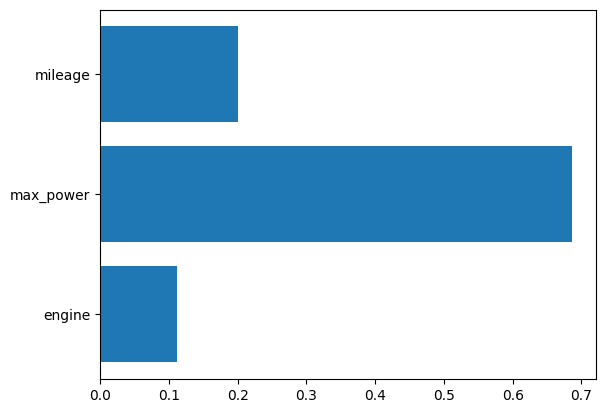

In [82]:
# Plot
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

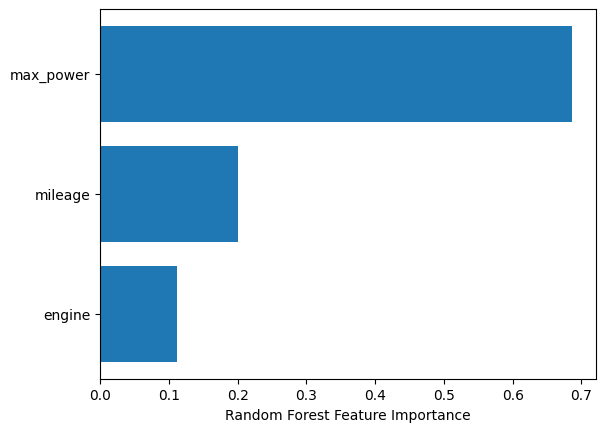

In [83]:
# Sort
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel('Random Forest Feature Importance')

#### Permutation way

This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.

*Note*: The permutation based importance is computationally expensive. The permutation based method can have problem with highly-correlated features, it can report them as unimportant.

Text(0.5, 0, 'Random Forest Feature Importance')

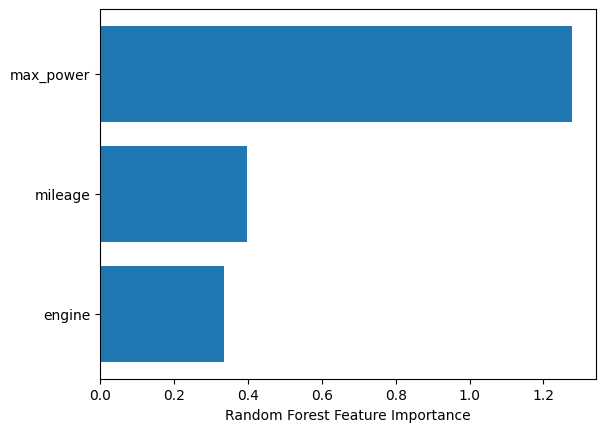

In [84]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

# Plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel('Random Forest Feature Importance')

#### Shap way

The SHAP interpretation can be used (it is model-agnostic) to compute the feature importances. It is using the Shapley values from game theory to estimate the how does each feature contribute to the prediction. It can be easily installed (<code>pip install shap</code>) 

In [85]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

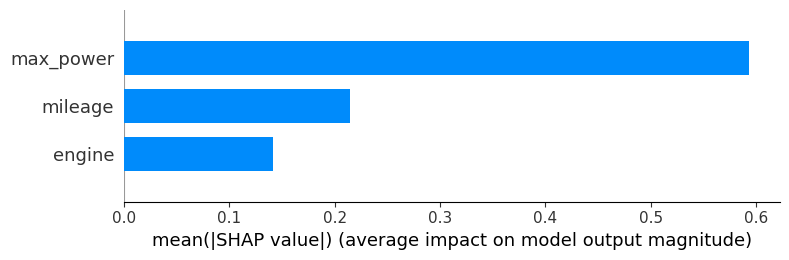

In [86]:
#shap provides plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

## 9. Inference

In [88]:
import pickle

# Save the model to disk
filename = './model/A1_Predicting_Car_Price_v3.model'
pickle.dump(grid, open(filename, 'wb'))

In [89]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [90]:
X_test

array([[-0.18006574, -0.05063609, -1.11398395],
       [ 0.24837778,  0.97141605,  0.06447149],
       [-0.92083257, -0.6988769 ,  0.27644206],
       ...,
       [-0.57247195, -0.75647321, -0.73546507],
       [-0.42031444, -0.09298632,  1.23283308],
       [-1.28921391, -1.03316136,  0.42532615]])

In [91]:
y_test

5948    0
6039    2
3069    1
6531    2
322     1
       ..
5744    0
1010    1
4856    0
7542    2
560     0
Name: selling_price_classes, Length: 2409, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [92]:
# Try inference 2 samples
inference_sample1 = np.array([[-0.18006574, -0.05063609, -1.11398395]])
inference_sample2 = np.array([[ 0.24837778,  0.97141605,  0.06447149]])

In [93]:
# Try to use inference sample 1 to predict
predicted_selling_price1 = loaded_model.predict(inference_sample1)
predicted_selling_price1

array([0.])

In [94]:
# Try to use inference sample 2 to predict
predicted_selling_price2 = loaded_model.predict(inference_sample2)
predicted_selling_price2

array([2.67215763])

### Convert backed before interence from log to normal by exp

In [ ]:
# predicted_selling_price1 = np.exp(predicted_selling_price1)
# predicted_selling_price1

In [ ]:
# predicted_selling_price2 = np.exp(predicted_selling_price2)
# predicted_selling_price2

## 10. Deployment

In [ ]:
# In Deployment Part I will do as
# Frontend use Bootstrap
# Backend uses Django
# Deploy to VM of ml2023 by Docker

# Report

After I coded this notebook, I can summarize as below.

Important Features consist of 
- max_power,
- mileage,
- engine
From Exploratory Data Analysis (EDA), the Correlation Matrix and Predictive Power Score (PPS) showed the max_power feature is highest weight with selling_price, engine and mileage also showed significant values with selling_price.

Algorithm to perform well is RandomForest as result scores from cross validation and grid search.

Algorithm to do lower consist of DecisionTree, KNeighbors, Linear Regression, and SVR respectively. 


In process of Inference can do well to predict with 2 inference_sample1 and 2.